In [1]:
from sympy import *
from IPython.display import display

We want to calculate the path length of an LoS that intersects an ellipsoid with two identical axes, $1 = \frac{x^2}{a^2} + \frac{y^2}{b^2} + \frac{z^2}{b^2}$, which represents an axisymmetric galaxy. 
The LoS is determined by an inclination angle $\theta$ w.r.t. the individual axis and two offset parameters y and z from the center of the galaxy. While z moves perpendiclar to the axis of inclination, the y parameter moves along one of the identical axes. Hence, y defines a plane parallel to x-z, whose intersection with the ellipsoid defines an ellipse which is intersected by the LoS. We first determine the axes of this ellipse and then obtain the path-length of the intersecting LoS within the ellipse.

The y coordinate on the ellipsoid is determined by the offset parameter, hence the ellipse equation can be rewritten as $1 = \frac{x^2}{a^2 \left( 1 - \frac{y^2}{b^2} \right) }  + \frac{z^2}{b^2\left( 1 - \frac{y^2}{b^2} \right)}$, determining the axes of the ellipse to be $a_{new} = a \sqrt{\left( 1 - \frac{y^2}{b^2} \right)}$ and $b_{new} = b \sqrt{\left( 1 - \frac{y^2}{b^2} \right)}$

By parametrizing the ellipse $r(\Theta)$ and the LoS $L(t|\theta)$, we determine their intersections and calculate the length of the vector between the two solutions, $|| r(\Theta_1) - r(\Theta_2) ||$.

In [2]:
Th, th, t, z, a, b = symbols("Theta theta t z a b")

r = [ b*sin(Th), a*cos(Th) ]
L = [ t*sin(th) + z*cos(th), t*cos(th) - z*sin(th) ]

## find solutions for Th or t, where r = L

In [3]:
t1=solve( r[0]-L[0], t)[0]
t2=solve( r[1]-L[1], t)[0]
display(t1,t2)

(b*sin(Theta) - z*cos(theta))/sin(theta)

a*cos(Theta)/cos(theta) + z*tan(theta)

In [4]:
#solve(t1-t2,Th)
## ... takes aeons ...

KeyboardInterrupt: 

works faster when reduced by hand to the following, where $a=a ~\sin(\theta)$ and $b=b ~\cos(\theta)$ (use trigonometric identity with z )

In [19]:
sol = solve( a*cos(Th) - b*sin(Th) + z, Th )

In [11]:
print("solutions for Theta")
for s in sol:
    display(s.subs(b,b*cos(th)).subs(a,a*sin(th)))

solutions for Theta


-2*atan((b*cos(theta) - sqrt(a**2*sin(theta)**2 + b**2*cos(theta)**2 - z**2))/(a*sin(theta) - z))

-2*atan((b*cos(theta) + sqrt(a**2*sin(theta)**2 + b**2*cos(theta)**2 - z**2))/(a*sin(theta) - z))

In [26]:
Th1, Th2 = symbols('Theta_1 Theta_2')

rr = [[0,0],[0,0]]
#for i, s in enumerate(sol):
#    ss = s.subs(b,b*cos(th)).subs(a,a*sin(th))
for i, ss in enumerate([Th1,Th2]):
    rr[i][0] = r[0].subs(Th, ss)
    rr[i][1] = r[1].subs(Th, ss)
print( "path length of LoS within ellipse" )
solution = sqrt(  (rr[0][0] - rr[1][0] )**2 + (rr[0][1] - rr[1][1] )**2 )
display(simplify(solution))

## unluckily, cannot be simplified further..

path length of LoS within ellipse


sqrt(a**2*(cos(Theta_1) - cos(Theta_2))**2 + b**2*(sin(Theta_1) - sin(Theta_2))**2)

 for the final solution, all $a$ and $b$ have to be replaced by the expressions derived above,
$a_{new} = a \sqrt{\left( 1 - \frac{y^2}{b^2} \right)}$ and $b_{new} = b \sqrt{\left( 1 - \frac{y^2}{b^2} \right)}$.


In [52]:
## test results  !!! z has to be small enough to be within the ellipse, otherwise solution is complex
##               !!! doesnt work if both exact theta=0 and z=0
solution_ = solution.subs(Th1,sol[0].subs(b,b*cos(th)).subs(a,a*sin(th))).subs(Th2,sol[1].subs(b,b*cos(th)).subs(a,a*sin(th)))

solution_.subs(th,0).subs(a,1).subs(b,40).subs(z,0.01)



1.99999993750000

In [50]:
import matplotlib.pyplot as plt, numpy as np

thetas = np.linspace(0.0001, np.pi, 91)
sols = [solution_.subs(th,th_).subs(a,1).subs(b,40).subs(z,0.0001) for th_ in thetas]

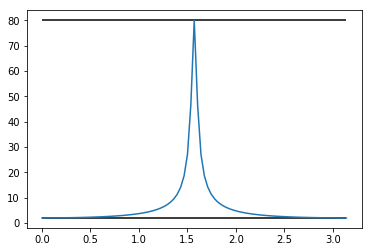

In [51]:
plt.plot(thetas, sols)
plt.hlines([2,80], 0., 3.14)